# Read csv files and plot the results

A basic script in R to:
 - Load data output from Netlogo behaviour space
     - In this case, a spreadsheet wouldn't work because there were more rows than could be loaded into OO Calc
     - The spreadsheet output is machine readable, but not really human readable (100 repetitions).
 - Make simple summary calculations
 - Plot the data
 - Format in rows and columns for a specific purpos (in this case, to load into graphpad prism)
 - Takes input from two files, processes them identically, and compares the data on the same plot.

### Initializing variables and pre-allocating arrays.

##### Read the csv files

In [39]:
# Clear all
rm(list=ls());
fileName1 = "cue1_2E_1I_2RR_4xCue_1000reps_csv.csv"
fileName2 = "cue2_2E_1I_2RR_4xCue_1000reps_csv.csv"
data1 =read.csv(fileName1,sep = ",",stringsAsFactors=FALSE) # Use "," for long spreadsheets outputted from Word
data2 =read.csv(fileName2,sep = ",",stringsAsFactors=FALSE)

##### Initialize global variables for reading the imported data

In [40]:
numLevelsVar1=3
numLevelsVar2=1
nIts=100 # Number of iterations
numReps=1000 # Number of repetitions
rowOffset=16 
frontOffset=0
backOffset=1
gcfcOffset=2
ratioOffset=3
setWidth=4
temp=rep(0,numReps) # Size needs to be consistent with number of repetitions

##### Create arrays to store summary calculations

In [41]:
someData <- rep(0, nIts*numLevelsVar1*numLevelsVar2);
data1array <- array(someData, c(nIts, numLevelsVar1, numLevelsVar2));  
data2array <- array(someData, c(nIts, numLevelsVar1, numLevelsVar2));  
data1sd <- array(someData, c(nIts, numLevelsVar1, numLevelsVar2));  
data2sd <- array(someData, c(nIts, numLevelsVar1, numLevelsVar2));  

### Read numeric data from spreadsheets

##### Read data from first spreadsheet

In [42]:
for(j in 1:numLevelsVar2){  
  # Read ratio data from data1
  currCol=2+setWidth*numReps*numLevelsVar1*(j-1)
  for(n in 1:numLevelsVar1){  
    for(m in 1:nIts){
      for(p in 1:numReps){
        temp[p] = suppressWarnings(as.numeric(data1[m+rowOffset,currCol+ratioOffset+setWidth*(p-1)]))
      }
      data1array[m,n,j]=mean(temp)
      data1sd[m,n,j]=sd(temp)
    }
    currCol=currCol+numReps*setWidth
  }
  

   # Read ratio data from data2
  currCol=2+setWidth*numReps*numLevelsVar1*(j-1)
  for(n in 1:numLevelsVar1){  # This seems to be working
    for(m in 1:nIts){
      for(p in 1:numReps){
        temp[p] = suppressWarnings(as.numeric(data2[m+rowOffset,currCol+ratioOffset+setWidth*(p-1)]))
      }
      data2array[m,n,j]=mean(temp)
      data2sd[m,n,j]=sd(temp)
    }
    currCol=currCol+numReps*setWidth
  }
}

In [43]:
#### Create plots

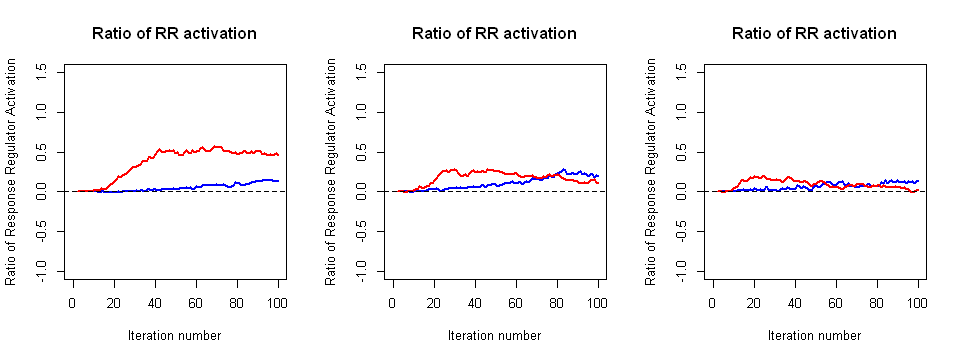

In [44]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3) # Change plot size to 8 x 3
par(mfrow=c(numLevelsVar2,numLevelsVar1))

# i=0
for(j in 1:numLevelsVar2){
  for(k in 1:numLevelsVar1){
#   i++
  plot(data1array[,k,j], type="l",lwd=2, col = "blue", xlim=c(0, 100), ylim=c(-1, 1.5),xlab = "", ylab = "")
  lines(data2array[,k,j],type="l",lwd=2, col = "red")
  abline(h=0, lty=2)
  str = "Ratio of RR activation"
  xlab = "Iteration number"
  ylab = "Ratio of Response Regulator Activation"
  title(main=str, xlab=xlab, ylab=ylab) 
  }
}

#### Create summary matrices, and format the data to use elsewhere.

In [45]:
# Summarize data in a matrix
summary1=matrix(0,100,3)
summary1[,1]=data1array[,1,1]
summary1[,2]=data1array[,2,1]
summary1[,3]=data1array[,3,1]
summary2=matrix(0,100,3)
summary2[,1]=data2array[,1,1]
summary2[,2]=data2array[,2,1]
summary2[,3]=data2array[,3,1]

# Format output for prism
meanStdN_1=matrix(0,100,3)
meanStdN_1[,1]=data1array[,3,1] # change number to look at different FC positions
meanStdN_1[,2]=data1sd[,3,1]
meanStdN_1[,3]=numReps
meanStdN_2=matrix(0,100,3)
meanStdN_2[,1]=data2array[,3,1]
meanStdN_2[,2]=data2sd[,3,1]
meanStdN_2[,3]=numReps